
# ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df1=pd.read_csv('AAPL.csv')

In [6]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059410,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925644,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200


In [8]:
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1001,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
1002,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
1003,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
1004,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
1005,2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [10]:
## Cleaning up the data
df = df1[['Date', 'Close']]
df.head()

,Date,Close
0,2020-01-02,75.087502
1,2020-01-03,74.357498
2,2020-01-06,74.949997
3,2020-01-07,74.597504
4,2020-01-08,75.797501


In [12]:
df.tail()

,Date,Close
1001,2023-12-22,193.600006
1002,2023-12-26,193.050003
1003,2023-12-27,193.149994
1004,2023-12-28,193.580002
1005,2023-12-29,192.529999


In [14]:
df.dtypes

Date      object
Close    float64
dtype: object

In [16]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

C:\Users\iamya\AppData\Local\Temp\ipykernel_424\2147723538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


In [18]:
df.head()

,Date,Close
0,2020-01-02,75.087502
1,2020-01-03,74.357498
2,2020-01-06,74.949997
3,2020-01-07,74.597504
4,2020-01-08,75.797501


In [20]:
df.set_index('Date',inplace=True)

In [22]:
df.head()

,Close
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501


In [24]:
df.describe()

,Close
count,1006.000000
mean,140.808131
std,33.313857
min,56.092499
25%,123.592501
50%,145.860001
75%,166.214996
max,198.110001


## Step 2: Visualize the Data

<Axes: xlabel='Date'>

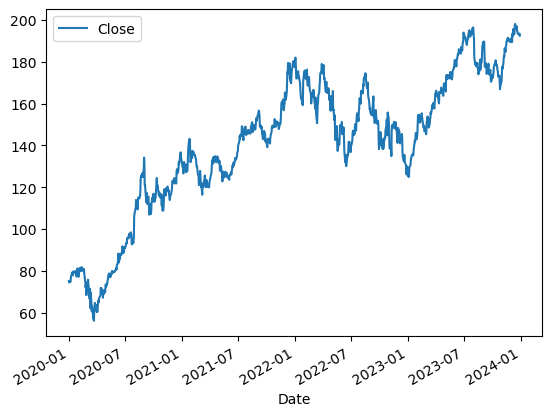

In [27]:
df.plot()

In [29]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [30]:
test_result=adfuller(df['Close'])

In [33]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [35]:
adfuller_test(df['Close'])

ADF Test Statistic : -1.555343687904244
p-value : 0.5059778789717134
#Lags Used : 0
Number of Observations Used : 1005
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [38]:
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)

C:\Users\iamya\AppData\Local\Temp\ipykernel_424\2311255844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close First Difference'] = df['Close'] - df['Close'].shift(1)


In [42]:
df['Close'].shift(1)

Date
2020-01-02           NaN
2020-01-03     75.087502
2020-01-06     74.357498
2020-01-07     74.949997
2020-01-08     74.597504
                 ...    
2023-12-22    194.679993
2023-12-26    193.600006
2023-12-27    193.050003
2023-12-28    193.149994
2023-12-29    193.580002
Name: Close, Length: 1006, dtype: float64

In [44]:
#df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [46]:
df.head(14)

,Close,Close First Difference
Date,,
2020-01-02,75.087502,NaN
2020-01-03,74.357498,-0.730003
2020-01-06,74.949997,0.592499
2020-01-07,74.597504,-0.352493
2020-01-08,75.797501,1.199997
2020-01-09,77.407501,1.610001
2020-01-10,77.582497,0.174995
2020-01-13,79.239998,1.657501
2020-01-14,78.169998,-1.070000


In [48]:
## Again test dickey fuller test
adfuller_test(df['Close First Difference'].dropna())

ADF Test Statistic : -33.00475656551278
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1004
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

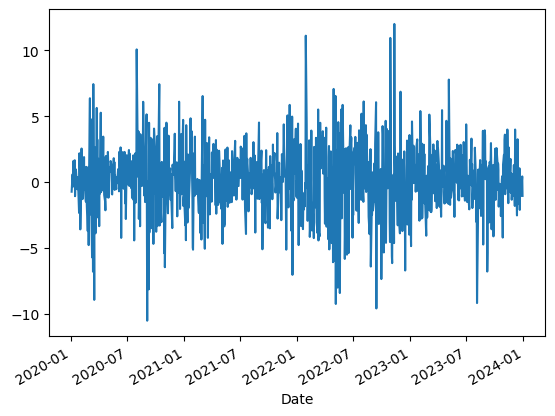

In [50]:
df['Close First Difference'].plot()

## Auto Regressive Model
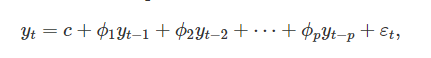

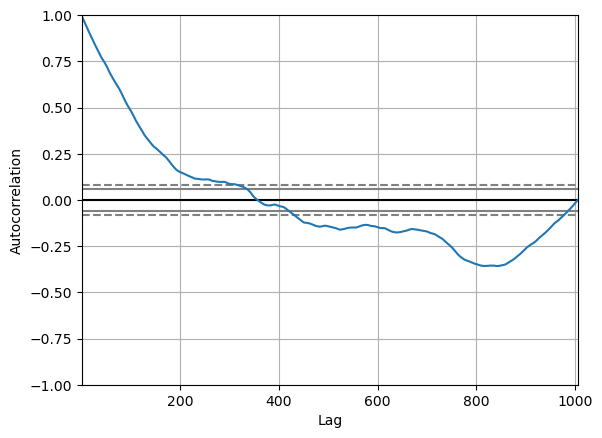

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

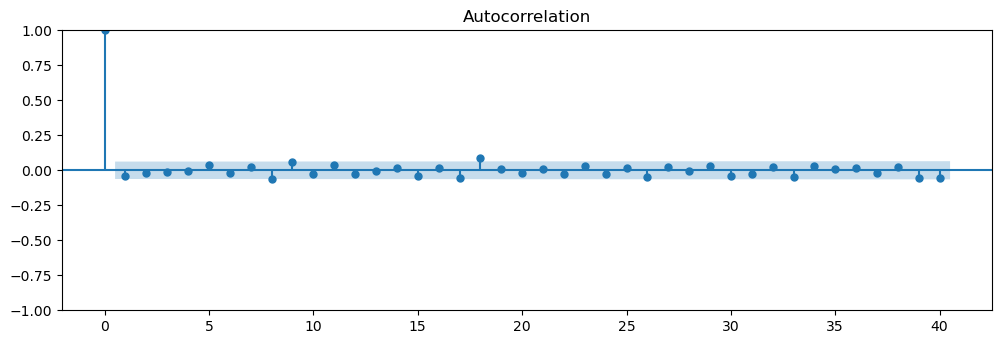

In [60]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close First Difference'].iloc[13:],lags=40,ax=ax1)

In [62]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [66]:
model=ARIMA(df['Close'],order=(1,1,0))
model_fit=model.fit()

C:\Users\iamya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\iamya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\iamya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [68]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1006
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2403.841
Date:                Wed, 31 Jul 2024   AIC                           4811.683
Time:                        22:10:43   BIC                           4821.508
Sample:                             0   HQIC                          4815.416
                               - 1006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0397      0.027     -1.487      0.137      -0.092       0.013
sigma2         6.9998      0.236     29.676      0.000       6.538       7.462
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               113.60
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.08
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\iamya\AppData\Local\Temp\ipykernel_424\2872399342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast']=model_fit.predict(start='2023-11-20',dynamic = True)


<Axes: xlabel='Date'>

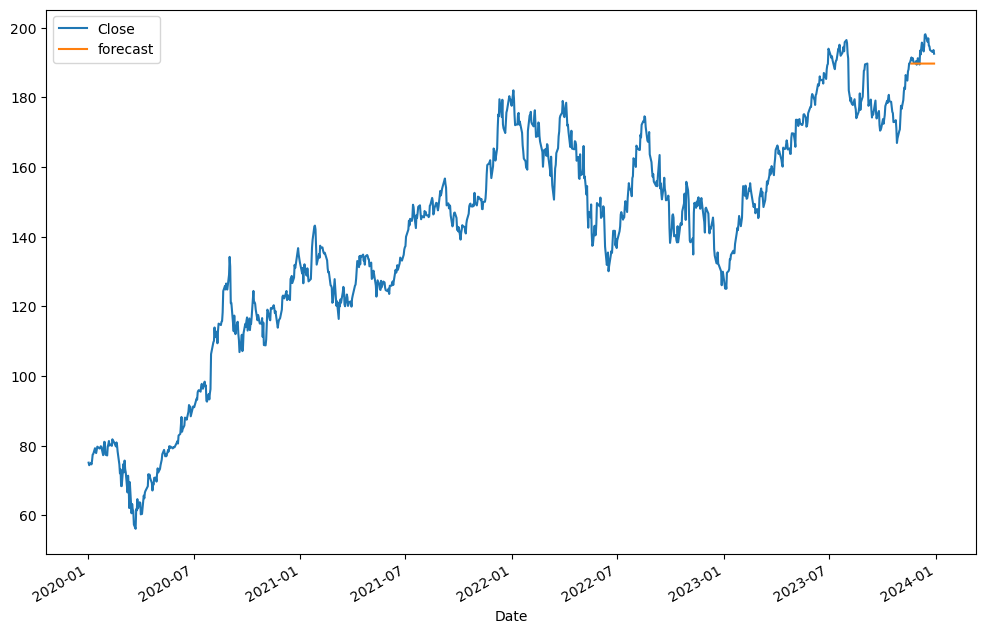

In [70]:
df['forecast']=model_fit.predict(start='2023-11-20',dynamic = True)
df[['Close','forecast']].plot(figsize=(12,8))